In [1]:
import pandas as pd

#agrego una columna para indicar si es del conjunto de entrenamiento o no
df = pd.read_csv('train.csv')

df.head(2)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.

In [2]:
def check_duplicates(df, columns=None):
    """
    Comprehensive duplicate checker for a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): DataFrame to check for duplicates
    columns (list, optional): Specific columns to check for duplicates. If None, checks all columns
    
    Returns:
    dict: Dictionary containing duplicate analysis results
    """
    # Initialize results dictionary
    results = {}
    
    # Check entire rows if no columns specified
    if columns is None:
        columns = df.columns.tolist()
    
    # Get duplicate rows
    duplicates = df.duplicated(subset=columns, keep='first')
    duplicate_df = df[duplicates]
    
    # Get rows with their duplicate counts
    duplicate_counts = df.duplicated(subset=columns, keep=False)
    value_counts = df[duplicate_counts][columns].value_counts()
    
    # Compile results
    results['has_duplicates'] = duplicates.any()
    results['total_duplicate_rows'] = duplicates.sum()
    results['duplicate_percentage'] = (duplicates.sum() / len(df) * 100).round(2)
    results['duplicate_rows'] = duplicate_df
    
    # Get index positions of duplicates
    results['duplicate_indices'] = duplicate_df.index.tolist()
    
    # Get most common duplicate values
    results['most_common_duplicates'] = value_counts.head()
    
    # Generate summary
    print(f"Duplicate Analysis Summary:")
    print(f"- Total rows in DataFrame: {len(df)}")
    print(f"- Number of duplicate rows: {results['total_duplicate_rows']}")
    print(f"- Percentage of duplicates: {results['duplicate_percentage']}%")
    
    if results['has_duplicates']:
        print("\nFirst few duplicate values:")
        print(results['most_common_duplicates'])
    
    return results


check_duplicates(df)

Duplicate Analysis Summary:
- Total rows in DataFrame: 1460
- Number of duplicate rows: 0
- Percentage of duplicates: 0.0%


{'has_duplicates': np.False_,
 'total_duplicate_rows': np.int64(0),
 'duplicate_percentage': np.float64(0.0),
 'duplicate_rows': Empty DataFrame
 Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolAre

- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.

In [3]:
df.shape

(1460, 81)

In [4]:
na_cols = df.isna().sum()[df.isna().sum() > 1]
print(na_cols)
#revisando el data_description.txt los NA son cuando no tienen lo que indica la columna, por eso los conservamos

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [5]:
# Numeric columns - integers
integer_columns = [
    'SalePrice',       # Dollar value
    'MSSubClass',      # Dwelling type categories are coded as numbers
    'OverallQual',     # 1-10 rating
    'OverallCond',     # 1-10 rating
    'YearBuilt',       # Year
    'YearRemodAdd',    # Year
    'BsmtFinSF1',      # Square footage
    'BsmtFinSF2',      # Square footage
    'BsmtUnfSF',       # Square footage
    'TotalBsmtSF',     # Square footage
    '1stFlrSF',        # Square footage
    '2ndFlrSF',        # Square footage
    'LowQualFinSF',    # Square footage
    'GrLivArea',       # Square footage
    'BsmtFullBath',    # Count
    'BsmtHalfBath',    # Count
    'FullBath',        # Count
    'HalfBath',        # Count
    'BedroomAbvGr',    # Count
    'KitchenAbvGr',    # Count
    'TotRmsAbvGrd',    # Count
    'Fireplaces',      # Count
    'GarageYrBlt',     # Year
    'GarageCars',      # Count
    'GarageArea',      # Square footage
    'WoodDeckSF',      # Square footage
    'OpenPorchSF',     # Square footage
    'EnclosedPorch',   # Square footage
    '3SsnPorch',       # Square footage
    'ScreenPorch',     # Square footage
    'PoolArea',        # Square footage
    'MiscVal',         # Dollar value
    'MoSold',          # Month (1-12)
    'YrSold'           # Year    
]

# Numeric columns - float
float_columns = [
    'LotFrontage',     # Linear feet, can be decimal
    'LotArea',         # Square feet, can be decimal
    'MasVnrArea'       # Square feet, can be decimal
]

# Categorical columns - ordered
ordered_categorical_columns = {
    'LotShape': ['Reg', 'IR1', 'IR2', 'IR3'],
    'Utilities': ['AllPub', 'NoSewr', 'NoSeWa', 'ELO'],
    'LandSlope': ['Gtl', 'Mod', 'Sev'],
    'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
    'HeatingQC': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'KitchenQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
    'Functional': ['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal'],
    'FireplaceQu': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'GarageFinish': ['Fin', 'RFn', 'Unf', 'NA'],
    'GarageQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'GarageCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
    'PoolQC': ['Ex', 'Gd', 'TA', 'Fa', 'NA']
}

# Categorical columns - unordered
nominal_categorical_columns = [
    'MSZoning',        # Zoning classification
    'Street',          # Road access type
    'Alley',           # Alley access type
    'LandContour',     # Flatness of property
    'LotConfig',       # Lot configuration
    'Neighborhood',    # Physical locations
    'Condition1',      # Proximity to conditions
    'Condition2',      # Proximity to conditions (if multiple)
    'BldgType',        # Type of dwelling
    'HouseStyle',      # Style of dwelling
    'RoofStyle',       # Roof type
    'RoofMatl',        # Roof material
    'Exterior1st',     # Exterior covering
    'Exterior2nd',     # Exterior covering (if multiple)
    'MasVnrType',      # Masonry veneer type
    'Foundation',      # Foundation type
    'BsmtFinType1',    # Basement finished area rating
    'BsmtFinType2',    # Second basement finished area rating
    'Heating',         # Heating type
    'CentralAir',      # Central air (Y/N)
    'Electrical',      # Electrical system
    'GarageType',      # Garage location
    'PavedDrive',      # Paved driveway (Y/P/N)
    'Fence',           # Fence quality
    'MiscFeature',     # Miscellaneous feature
    'SaleType',        # Type of sale
    'SaleCondition'    # Condition of sale
]

In [6]:
# Set integer columns
for col in integer_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')  # Int64 allows NaN values

# Set float columns
for col in float_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype('float64')

# Set categorical columns - ordered
for col, categories in ordered_categorical_columns.items():
    df[col] = pd.Categorical(df[col], categories=categories, ordered=True)

# Set categorical columns - nominal
for col in nominal_categorical_columns:
    df[col] = pd.Categorical(df[col], ordered=False)

In [7]:
#Elimino las filas donde utilities, kitchenqual o functional son NA
df.dropna(subset=['Utilities','KitchenQual','Functional'], inplace=True)

In [8]:
#Y reemplazo los NaN por 'NA' donde si pueden llevar 'NA' como una de las categorias
col_na = df[list(ordered_categorical_columns.keys())].isna().sum()[df[list(ordered_categorical_columns.keys())].isna().sum()>0].index.tolist()
df[col_na] = df[col_na].fillna('NA')

In [9]:
print(df.isna().sum()[df.isna().sum() > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
GarageType        81
GarageYrBlt       81
Fence           1179
MiscFeature     1406
dtype: int64


- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.

In [10]:
from sklearn.preprocessing import OrdinalEncoder
# Especificar las categorías para el OrdinalEncoder
categorias_ordenadas = list(ordered_categorical_columns.values())

# Convertir variables categóricas ordenadas
ordinal_encoder = OrdinalEncoder(categories=categorias_ordenadas)
df[list(ordered_categorical_columns.keys())] = ordinal_encoder.fit_transform(df[list(ordered_categorical_columns.keys())])

# Convertir variables nominales usando One-Hot Encoding, mantengo los NA, por que no estan missing at random
df = pd.get_dummies(df, columns=nominal_categorical_columns, dummy_na=True)

- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

In [11]:
print(df.isna().sum()[df.isna().sum() > 0])

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


In [12]:
# Rellenar los valores faltantes en columnas continuas con la mediana
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].median())
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# Rellenar los valores faltantes en columnas de tipo entero con el valor más frecuente (moda)
df['BsmtFullBath'] = df['BsmtFullBath'].fillna(df['BsmtFullBath'].mode()[0])
df['BsmtHalfBath'] = df['BsmtHalfBath'].fillna(df['BsmtHalfBath'].mode()[0])

# Verificar que ya no haya valores faltantes en estas columnas
print(df.isna().sum()[df.isna().sum() > 0])

Series([], dtype: int64)


### Exploración de Datos:
- **Visualizaciones univariadas y multivariadas:** Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.

C:\Users\Diego\AppData\Local\Temp\ipykernel_12880\3319924783.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlations.values,


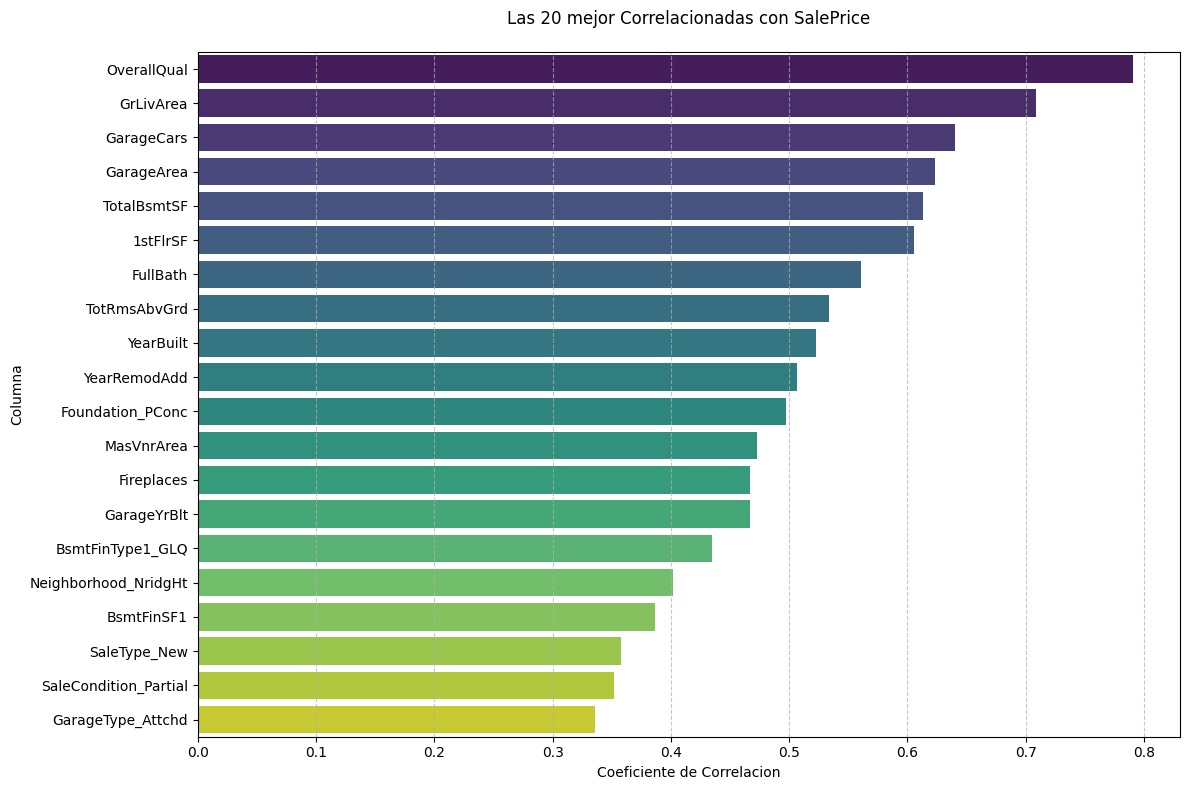

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
n = 20
target = 'SalePrice'
correlations = df.corr()[target].sort_values(ascending=False)

# Get top n correlations (excluding the target variable itself)
top_correlations = correlations[1:n+1]

# Create figure with appropriate size
plt.figure(figsize=(12, 8))

# Create barplot
sns.barplot(x=top_correlations.values, 
               y=top_correlations.index, 
            palette='viridis')

# Customize the plot
plt.title(f'Las {n} mejor Correlacionadas con {target}', pad=20)
plt.xlabel('Coeficiente de Correlacion')
plt.ylabel('Columna')

# Add gridlines
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()

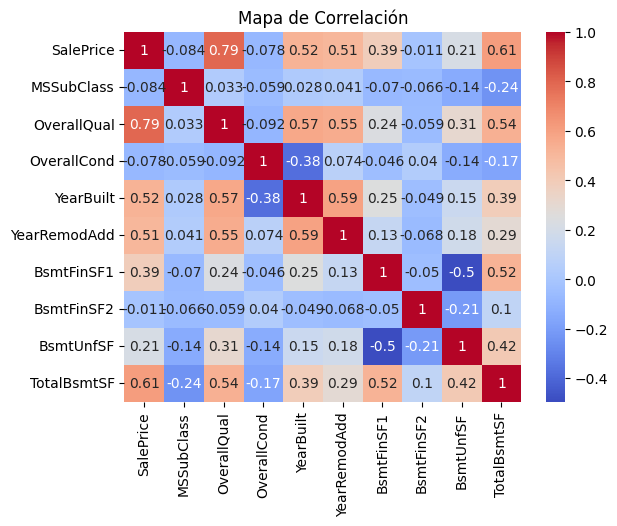

In [14]:
# Crear un heatmap
n = 10
plt.figure()
sns.heatmap(df[integer_columns[:n]].corr(), annot=True, cmap='coolwarm')

plt.title('Mapa de Correlación')
plt.show()

<Axes: xlabel='OverallQual', ylabel='Count'>

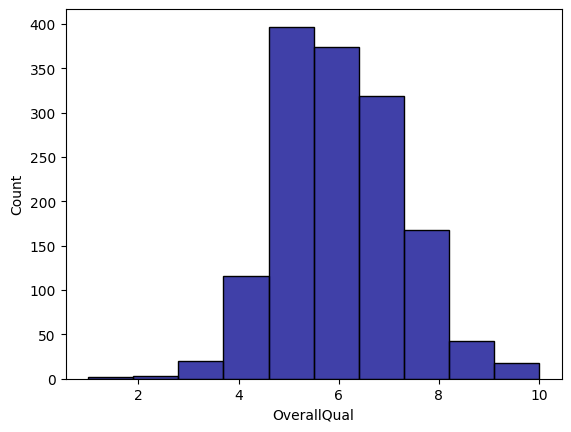

In [15]:
#Crear un histograma
sns.histplot(data = df, x="OverallQual", bins =10,color ='darkblue')

C:\Users\Diego\AppData\Local\Temp\ipykernel_12880\1626949265.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scat['OverallQual'] = df_scat['OverallQual'].astype('int64')


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

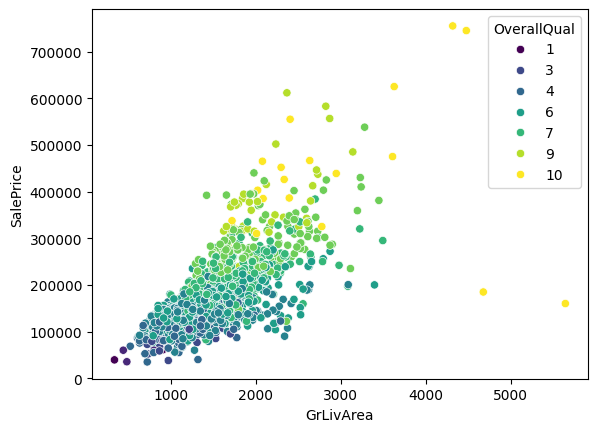

In [16]:
#Crear un diagrama de dispersion
df_scat = df[['GrLivArea','SalePrice','OverallQual']]

df_scat['OverallQual'] = df_scat['OverallQual'].astype('int64')
plt.figure()
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_scat, palette='viridis', hue='OverallQual')

- **Estadísticas descriptivas:** Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

In [17]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,...,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.0,1460.0,1460.0,1460.0
mean,730.500000,56.89726,69.863699,10516.828082,0.408219,0.001370,0.062329,6.099315,5.575342,1971.267808,...,46.660274,21.95411,3.409589,15.060959,2.758904,3.986986,43.489041,6.321918,2007.815753,180921.19589
std,421.610009,42.300571,22.027677,9981.264932,0.582296,0.052342,0.276232,1.382997,1.112799,30.202904,...,66.256028,61.119149,29.317331,55.757415,40.177307,0.204059,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.0,21.000000,1300.000000,0.000000,0.000000,0.000000,1.0,1.0,1872.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,2006.0,34900.0
25%,365.750000,20.0,60.000000,7553.500000,0.000000,0.000000,0.000000,5.0,5.0,1954.0,...,0.0,0.0,0.0,0.0,0.0,4.000000,0.0,5.0,2007.0,129975.0
50%,730.500000,50.0,69.000000,9478.500000,0.000000,0.000000,0.000000,6.0,5.0,1973.0,...,25.0,0.0,0.0,0.0,0.0,4.000000,0.0,6.0,2008.0,163000.0
75%,1095.250000,70.0,79.000000,11601.500000,1.000000,0.000000,0.000000,7.0,6.0,2000.0,...,68.0,0.0,0.0,0.0,0.0,4.000000,0.0,8.0,2009.0,214000.0
max,1460.000000,190.0,313.000000,215245.000000,3.000000,2.000000,2.000000,10.0,9.0,2010.0,...,547.0,552.0,508.0,480.0,738.0,4.000000,15500.0,12.0,2010.0,755000.0


### Implementación de Modelos:
- Modelos de Regresión: Implementa modelos de Linear Regression y LightGBM (LGBM).
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como MSE, RMSE, y R^2.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = df.drop('SalePrice', axis = 1)
y = df[['SalePrice']]

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Use all cores except one
import os
n_cores = max(os.cpu_count() - 1, 1)  
os.environ["LOKY_MAX_CPU_COUNT"] = str(n_cores)

### 2. Modelo de Regresión Lineal
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lr = lr_model.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print(f"MSE: {mse_lr:.2f}, RMSE: {rmse_lr:.2f}, R^2: {r2_lr:.2f}")

### 3. Modelo LightGBM
lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train)

# Predicciones y evaluación
y_pred_lgbm = lgbm_model.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

print("\nLightGBM Metrics:")
print(f"MSE: {mse_lgbm:.2f}, RMSE: {rmse_lgbm:.2f}, R^2: {r2_lgbm:.2f}")


Linear Regression Metrics:
MSE: 923390298.25, RMSE: 30387.34, R^2: 0.88
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001687 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3439
[LightGBM] [Info] Number of data points in the train set: 1168, number of used features: 157
[LightGBM] [Info] Start training from score 181441.541952

LightGBM Metrics:
MSE: 869723185.02, RMSE: 29491.07, R^2: 0.89


Como era de esperarse, podemos ver que el modelo de LightGBM, nos da mejores resultados en las 3 metricas y podriamos seguir mejorandolo con una optimizacion de hiperparametros.